In this mini project, the use of Machine learning is used to predict advertising to determine amount of sale that will be realized

## Import the required library

In [1]:
# Importing the required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [2]:
# Loading data
filePath = 'data/Advertising.csv'
data = pd.read_csv(filePath)
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
# Check the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
# Check for statistical information
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


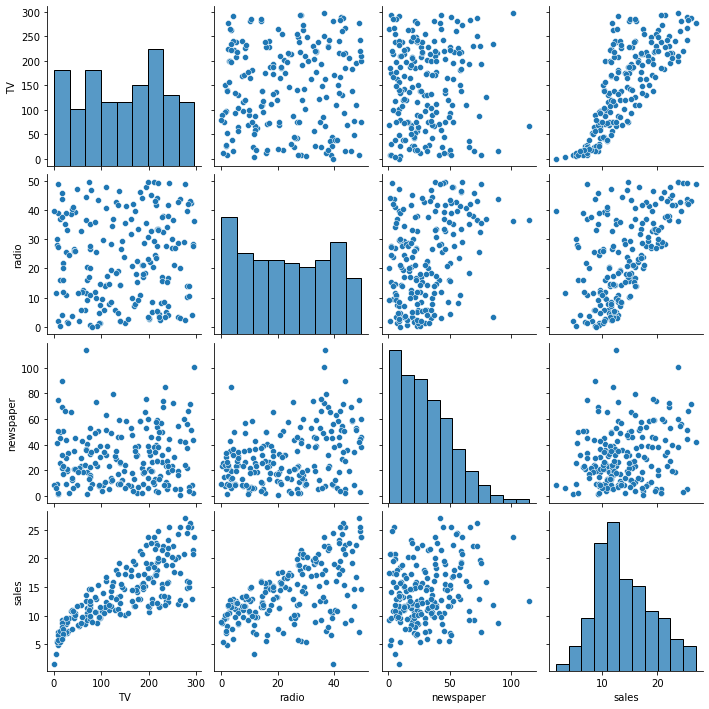

In [5]:
# Visualize the data
sns.pairplot(data);

## Split data feature and lable

In [6]:
# Split the data into features and labels
X = data.drop(['sales'], axis=1)
y = data['sales']

In [7]:
X.shape, y.shape

((200, 3), (200,))

## Split data into training and testing

In [8]:
# Split the data into train test split
# Importing the required model
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [10]:
X_train.shape,X_test.shape

((160, 3), (40, 3))

In [11]:
y_train.shape, y_test.shape

((160,), (40,))

## Creating the model

In [12]:
# Importing the required library
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression()

In [14]:
# Fit the model
model.fit(X_train, y_train)

LinearRegression()

## Testing for Performance

In [15]:
# X_test

In [16]:
# y_test

In [17]:
# Pass in the test feature
pred = model.predict(X_test)

In [18]:
pred

array([15.68292592, 19.58907536, 11.33442246, 16.97160642,  9.00229777,
        6.8258424 , 20.28370847, 17.25050474,  9.62422935, 19.21261943,
       12.28165709, 13.79124205, 13.63171832, 21.3166205 , 18.4260183 ,
        9.83360121, 15.48826256,  7.50717778,  7.37608168, 20.40569824,
        7.61221263, 18.21702553, 24.75227276, 22.87105326,  7.79566192,
       12.55620637, 21.47155589,  7.89397664, 12.3119109 , 12.41822104,
       10.6650977 , 19.23984433,  9.92216352,  6.53329195, 17.27904496,
        7.60035587,  9.1023379 ,  8.10416927, 10.45284718, 10.49584758])

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [20]:
MAE = mean_absolute_error(y_test, pred)

In [21]:
MSE = mean_squared_error(y_test, pred)

In [22]:
RMSE = np.sqrt(MSE)

In [23]:
MAE

1.124475000625565

In [24]:
MSE

2.063418850121476

In [25]:
RMSE

1.43646052856369

## Residuals

In [26]:
test_residual = y_test - pred

In [27]:
# test_residual

<AxesSubplot:xlabel='sales', ylabel='sales'>

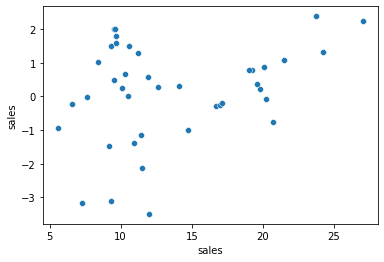

In [28]:
sns.scatterplot(x=y_test, y=test_residual)

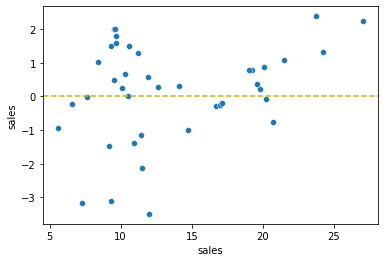

In [29]:
sns.scatterplot(x=y_test, y=test_residual)
plt.axhline(y=0, color='y', linestyle='--')

In [30]:
len(test_residual)

40

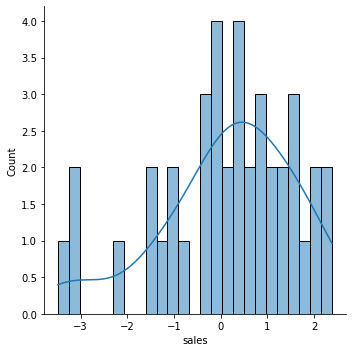

In [31]:
sns.displot(test_residual, bins=25, kde=True)

In [32]:
# Check if normality is the best approach
import scipy as sp

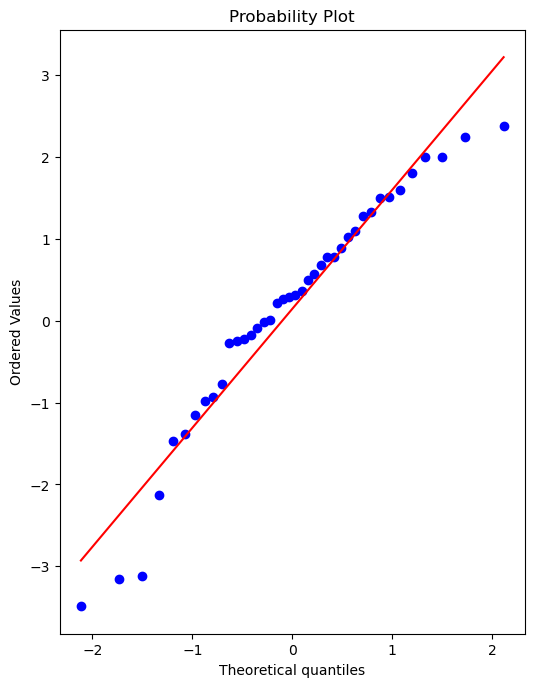

In [33]:
fig, ax = plt.subplots(figsize=(6,8), dpi=100) 
_ = sp.stats.probplot(test_residual, plot=ax)

## Retraining the Model on full data

In [34]:
finalMode = LinearRegression()

In [35]:
finalMode.fit(X,y)

LinearRegression()

In [36]:
finalMode.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [37]:
# Making the coefficient into a dataframe
coeff_df = pd.DataFrame(finalMode.coef_,X.columns,columns=['Coefficients'])
coeff_df

,Coefficients
TV,0.045765
radio,0.188530
newspaper,-0.001037


In [38]:
# Checking for corrolation
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


## Predicting new data with the trained model

In [49]:
# TV = 158, radio = 42, newspaper = 15
new_campaign = [[180.8, 10.8, 58.4]] 

In [50]:
finalMode.predict(new_campaign)

array([13.18867186])

## Saving and loading the model

In [41]:
from joblib import dump, load

In [42]:
# Save the model to a file called adv_sales_model.joblib
dump(finalMode, 'adv_sales_model.joblib')

['adv_sales_model.joblib']

In [43]:
# Load the file and predict
loaded_adv_model = load('adv_sales_model.joblib')

In [44]:
loaded_adv_model.predict(new_campaign)

array([18.07240167])

THE END